# **Stock Market Analysis**

Stock Market Analysis involves calculating moving averages, measuring volatility, conducting correlation analysis and analyzing various aspects of the stock market to gain a deeper understanding of the factors that affect stock prices and the relationships between the stock prices of different companies.

In this project, we will conduct an analysis of the stocks belonging to Nvidia, Google, Twilio, Tencent, and Salesforce, all of which are prominent companies in the robotics industry. By utilizing the yfinance library, we will extract relevant financial data from Yahoo Finance to gain valuable insights into the historical performance, trends, and future projections of these stocks.

The robotics industry has experienced remarkable growth in recent years, propelled by technological advancements and increasing demand across various sectors, including manufacturing, healthcare, and logistics. Examining the stocks of key players in this sector will enable us to acquire a deeper understanding of investment opportunities and the overall performance of the industry.

Throughout our analysis, we will explore multiple aspects of these stocks, including their historical price changes, average daily returns, moving averages, correlation between stocks, and risk assessment associated with each stock. Additionally, we will analyze stock volatility and track their cumulative performance. The primary objective is to provide a comprehensive understanding of the performance and associated risks involved in investing in these stocks.

The analysis will be divided into the following sections:

* Price Change Analysis Over Time.
* Determination of Moving Averages.
* Utilizing Daily Percentage Change: Analyzing Price Volatility.
* Cumulative Performance: Tracking Overall Stock Performance.
* Exploration of Correlation Between Stocks.
* Evaluation of Risk Associated with Investing.

## **Libraries**

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import plotly.express as px
import pandas as pd
from pandas.plotting import scatter_matrix
import datetime as dt
import yfinance as yf
import numpy as np
import seaborn as sns
import ta
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2023,6,7)

In [3]:
nvidia = yf.download("NVDA",start, end)
google = yf.download("GOOGL", start, end)
twilio = yf.download("TWLO", start, end)
tencent = yf.download("TCEHY", start, end)
salesforce = yf.download("CRM", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## **Price Change Analysis Over Time**

The closing price of a stock is indeed the last price at which it is traded during the regular trading day. It represents the final transaction price for the stock on that particular day. The closing price is widely used by investors and traders as a benchmark to track the performance of a stock over time.

By comparing the closing prices of a stock over multiple trading days, investors can identify trends and patterns in its price movement. It serves as a reference point for calculating various technical indicators, such as moving averages, support and resistance levels, and price momentum indicators. Additionally, the closing price is often used in financial charting and technical analysis to draw trendlines, identify chart patterns, and make buy or sell decisions.

The closing price is also essential for calculating investment returns, as it is commonly used as the reference price for measuring gains or losses. It is used in various return metrics, such as daily returns, cumulative returns, and annualized returns.

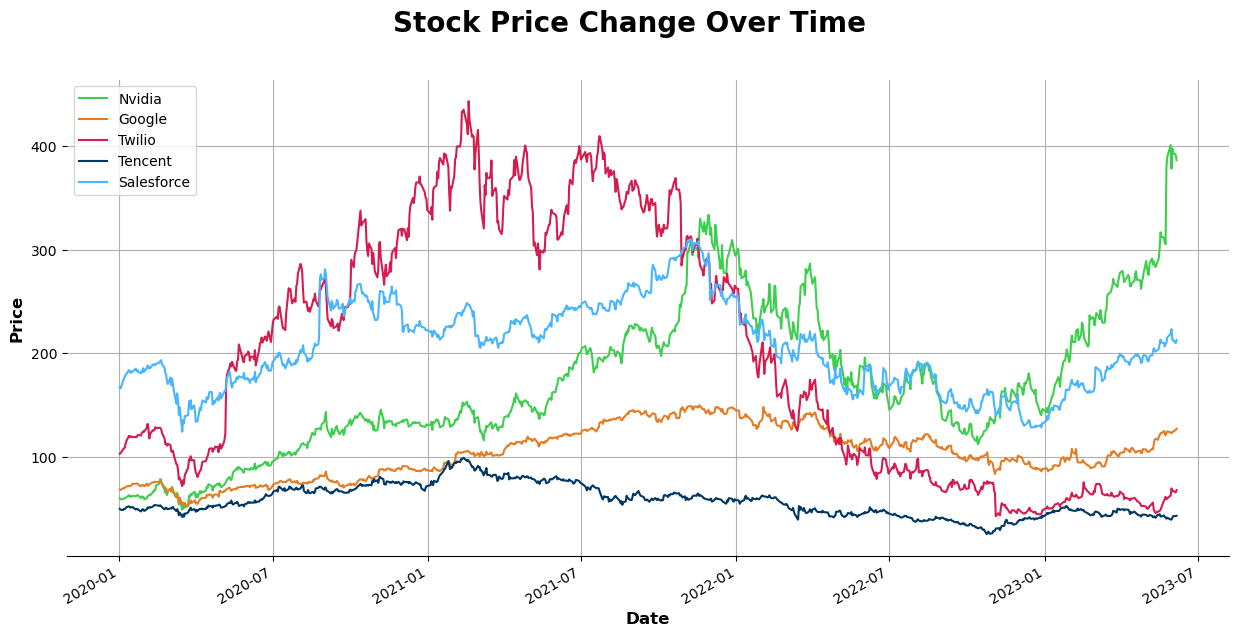

In [4]:
# POSSITION
fig = plt.figure(figsize = (15,7))
fig.suptitle("Stock Price Change Over Time", fontsize = 20, fontweight = "bold")
gs = fig.add_gridspec(nrows = 1, ncols = 1)
ax0 = fig.add_subplot(gs[0,0])

# OPENING STOCK PRICES PLOT
nvidia["Close"].plot(label = "Nvidia", color = "#3CCF4E", ax = ax0)
google["Close"].plot(label = "Google", color = "#E57C23", ax = ax0)
twilio["Close"].plot(label = "Twilio", color = "#D61C4E", ax = ax0)
tencent["Close"].plot(label = "Tencent", color = "#003865", ax = ax0)
salesforce["Close"].plot(label = "Salesforce", color = "#47B5FF", ax = ax0)
ax0.set_xlabel("Date", fontsize = 12, fontweight = "bold")
ax0.set_ylabel("Price", fontsize = 12, fontweight = "bold")
ax0.spines[["top", "left", "right"]].set_visible(False)
ax0.grid()

plt.legend()
plt.show()

## **Volume Traded**

It refers to the total number of shares, contracts, or securities that have been bought and sold within a specific period in the financial market. It is a measure of market activity and liquidity as it indicates the number of transactions that have taken place.

Traded volume is recorded as the total number of shares or contracts that have changed hands during a specific period, such as a day, week, month, or any other time interval. For example, if 100,000 shares of a particular company are traded in a day, then the traded volume for that day would be 100,000 shares.

Traded volume is an important metric for investors and traders as it can provide information about the demand and interest in a particular asset. A high volume indicates a greater number of transactions and may indicate increased market interest in buying or selling the asset. On the other hand, low volume may indicate lower activity and liquidity in the market.

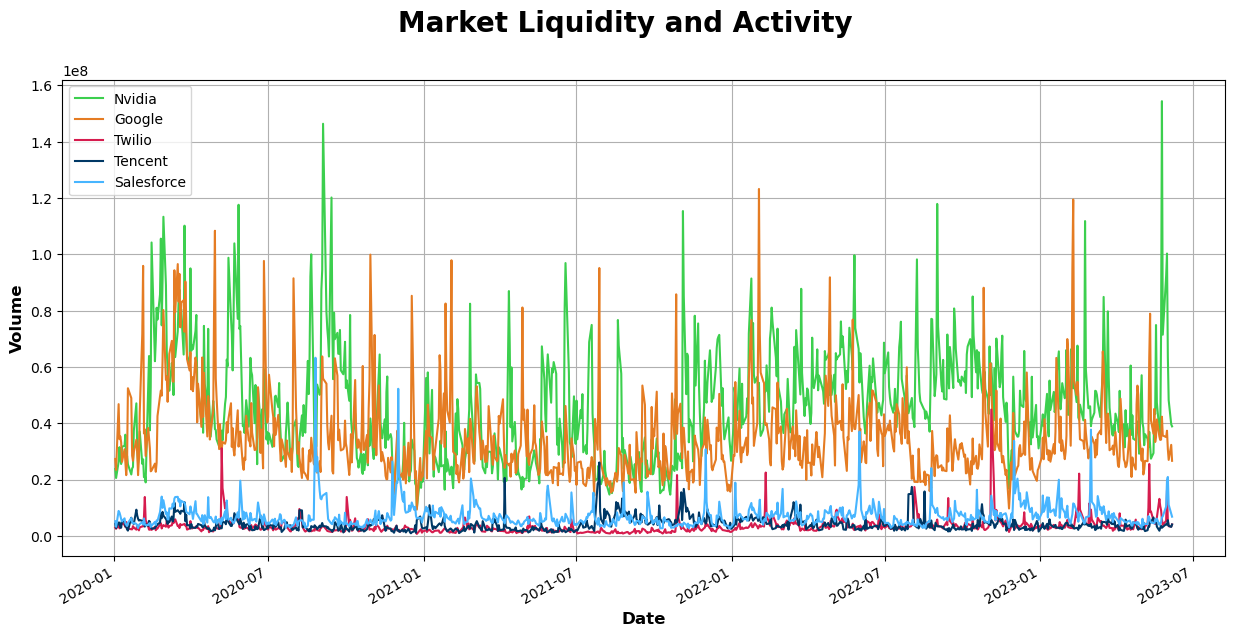

In [5]:
# POSITION 
fig = plt.figure(figsize = (15,7))
fig.suptitle("Market Liquidity and Activity", fontsize = 20, fontweight = "bold")
gs = fig.add_gridspec(nrows = 1, ncols = 1)
ax0 = fig.add_subplot(gs[0,0])

# VOLUME TRADED PLOT
nvidia["Volume"].plot(label = "Nvidia", color = "#3CCF4E", ax = ax0)
google["Volume"].plot(label = "Google", color = "#E57C23", ax = ax0)
twilio["Volume"].plot(label = "Twilio", color = "#D61C4E", ax = ax0)
tencent["Volume"].plot(label = "Tencent", color = "#003865", ax = ax0)
salesforce["Volume"].plot(label = "Salesforce", color = "#47B5FF", ax = ax0)
ax0.set_ylabel("Volume", fontsize = 12, fontweight = "bold")
ax0.set_xlabel("Date", fontsize = 12, fontweight = "bold")
ax0.grid()
plt.legend()
plt.show()

## **Moving Averages**

Moving averages are statistical calculations used to analyze the overall trend and smooth out fluctuations in a time series data set. They are commonly used in financial analysis and technical analysis to identify patterns, assess price trends, and make informed trading decisions.

A moving average is calculated by taking the average value of a specified number of data points over a defined period and then updating it as new data becomes available. The most commonly used moving averages include the simple moving average (SMA) and the exponential moving average (EMA).

The simple moving average (SMA) is calculated by summing up a specific number of data points and dividing the sum by the number of periods. For example, a 10-day SMA would be calculated by summing up the closing prices of the last 10 days and dividing the sum by 10.

The exponential moving average (EMA) gives more weight to recent data points, which makes it more responsive to recent price changes. It uses a mathematical formula to calculate the weighted average, giving greater significance to the most recent data points.

Moving averages help to smooth out short-term price fluctuations, providing a clearer view of the overall trend. They are often used to generate trading signals, such as identifying trend reversals or confirming the strength of a trend. Traders and analysts also use moving averages to determine support and resistance levels, as well as to identify potential entry and exit points for trades.

#### **Exponential Moving Averages**

In [6]:
company_list = [nvidia, google, twilio, tencent, salesforce]
ema_day = [10, 20]


for ema in ema_day:
    for company in company_list:
        column_name = f"EMA {ema}"
        company[column_name] = company['Close'].ewm(ema, adjust=False).mean()

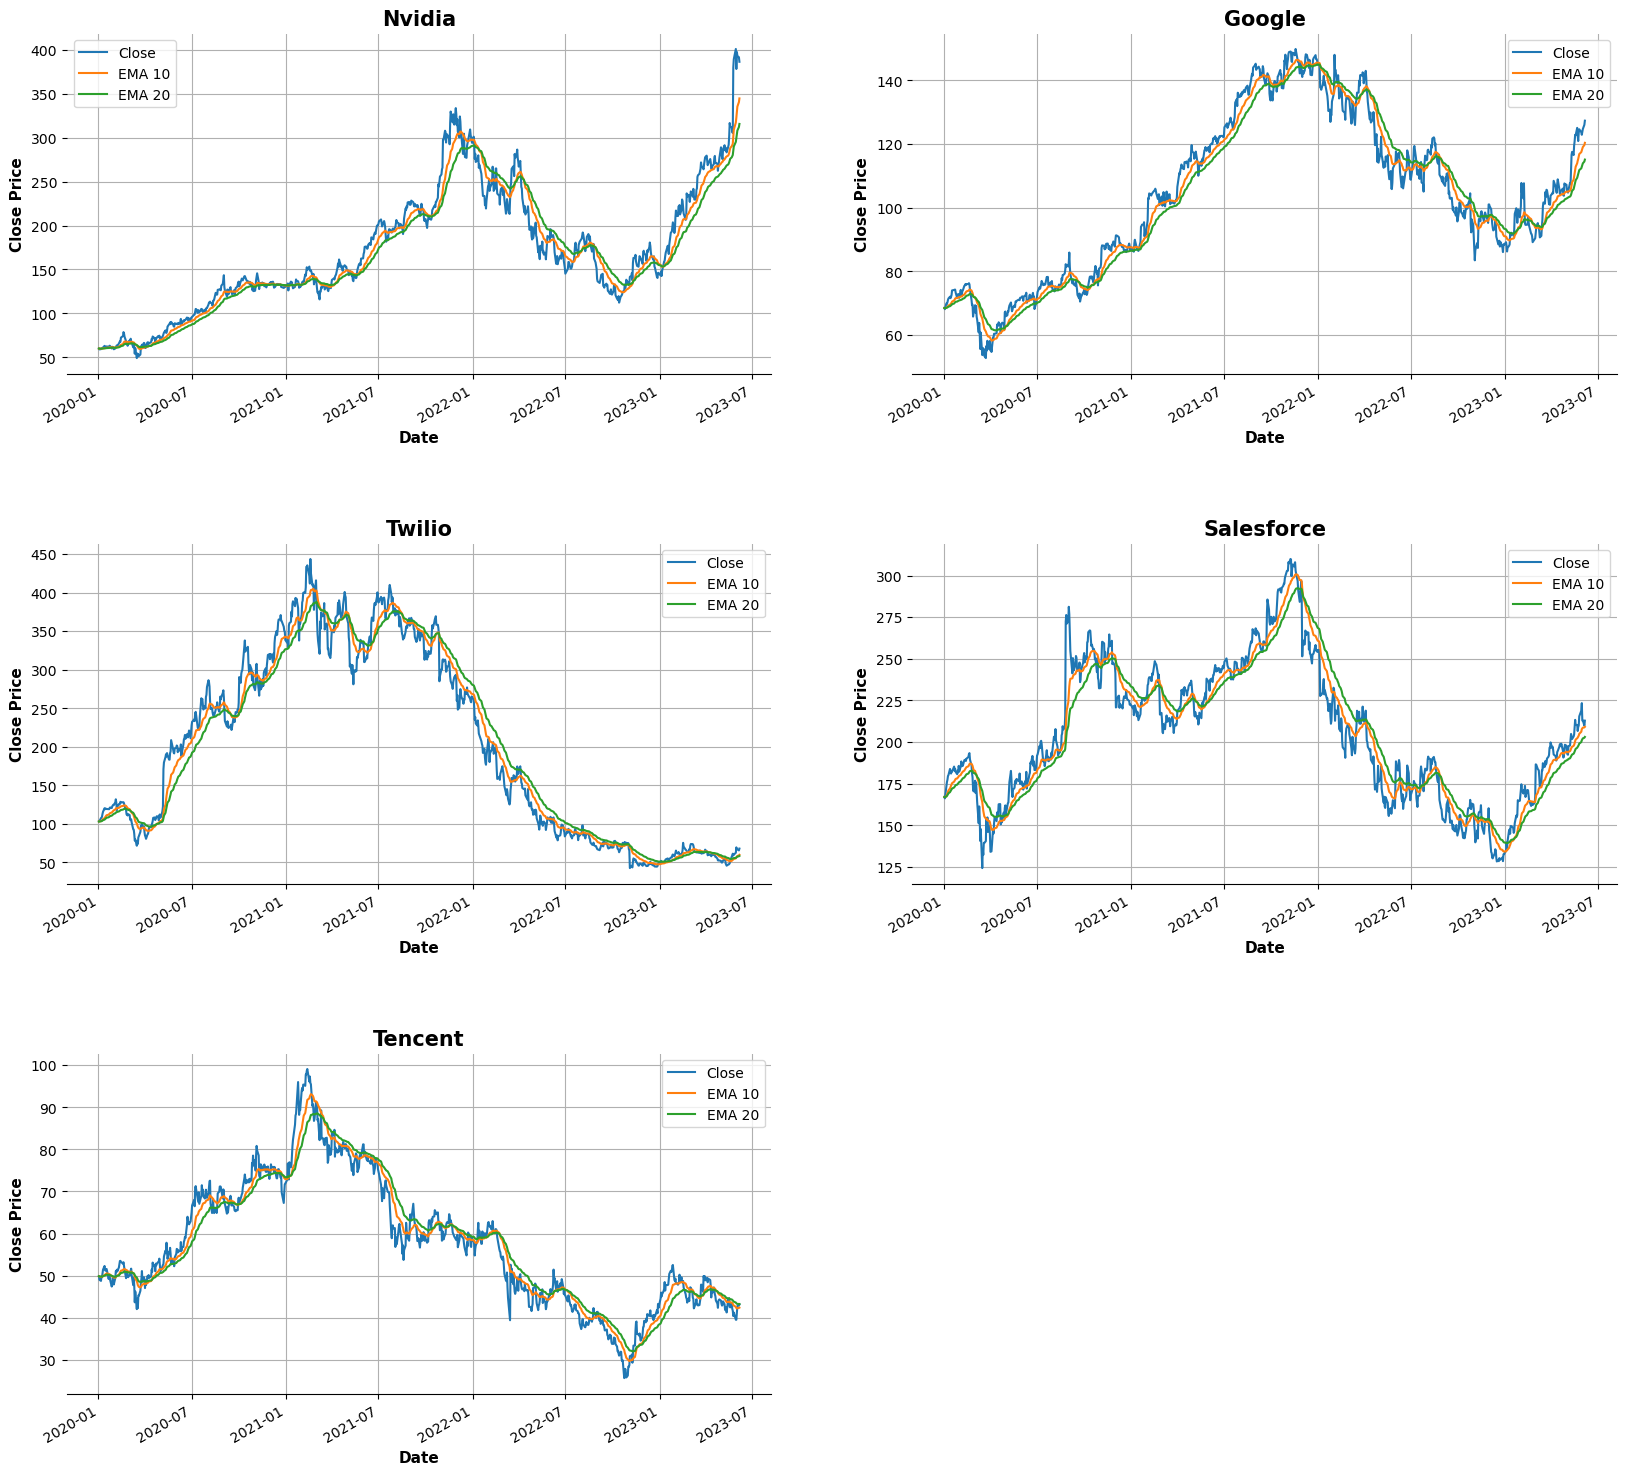

In [7]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
gs = fig.add_gridspec(nrows = 3, ncols = 2, hspace = .5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])

ax0.set_title("Nvidia", fontsize = 15, fontweight = "bold")
nvidia[["Close", "EMA 10", "EMA 20"]].plot(ax = ax0)
ax0.grid()

ax1.set_title("Google", fontsize = 15, fontweight = "bold")
google[["Close", "EMA 10", "EMA 20"]].plot(ax = ax1)
ax1.grid()

ax2.set_title("Twilio", fontsize = 15, fontweight = "bold")
twilio[["Close", "EMA 10", "EMA 20"]].plot(ax = ax2)
ax2.grid()

ax3.set_title("Salesforce", fontsize = 15, fontweight = "bold")
salesforce[["Close", "EMA 10", "EMA 20"]].plot(ax = ax3)
ax3.grid()

ax4.set_title("Tencent", fontsize = 15, fontweight = "bold")
tencent[["Close", "EMA 10", "EMA 20"]].plot(ax = ax4)
ax4.grid()

for a in [ax0, ax1, ax2, ax3, ax4]:
    a.set_xlabel("Date", fontsize = 11, fontweight = "bold")
    a.set_ylabel("Close Price", fontsize = 11, fontweight = "bold")
    a.spines[["left", "right", "top"]].set_visible(False)

#### **Simple Moving Averages**

In [8]:
company_list = [nvidia, google, twilio, tencent, salesforce]
ma_day = [10, 20]


for ma in ma_day:
    for company in company_list:
        column_name = f"MA {ma}"
        company[column_name] = company['Close'].rolling(ma).mean()

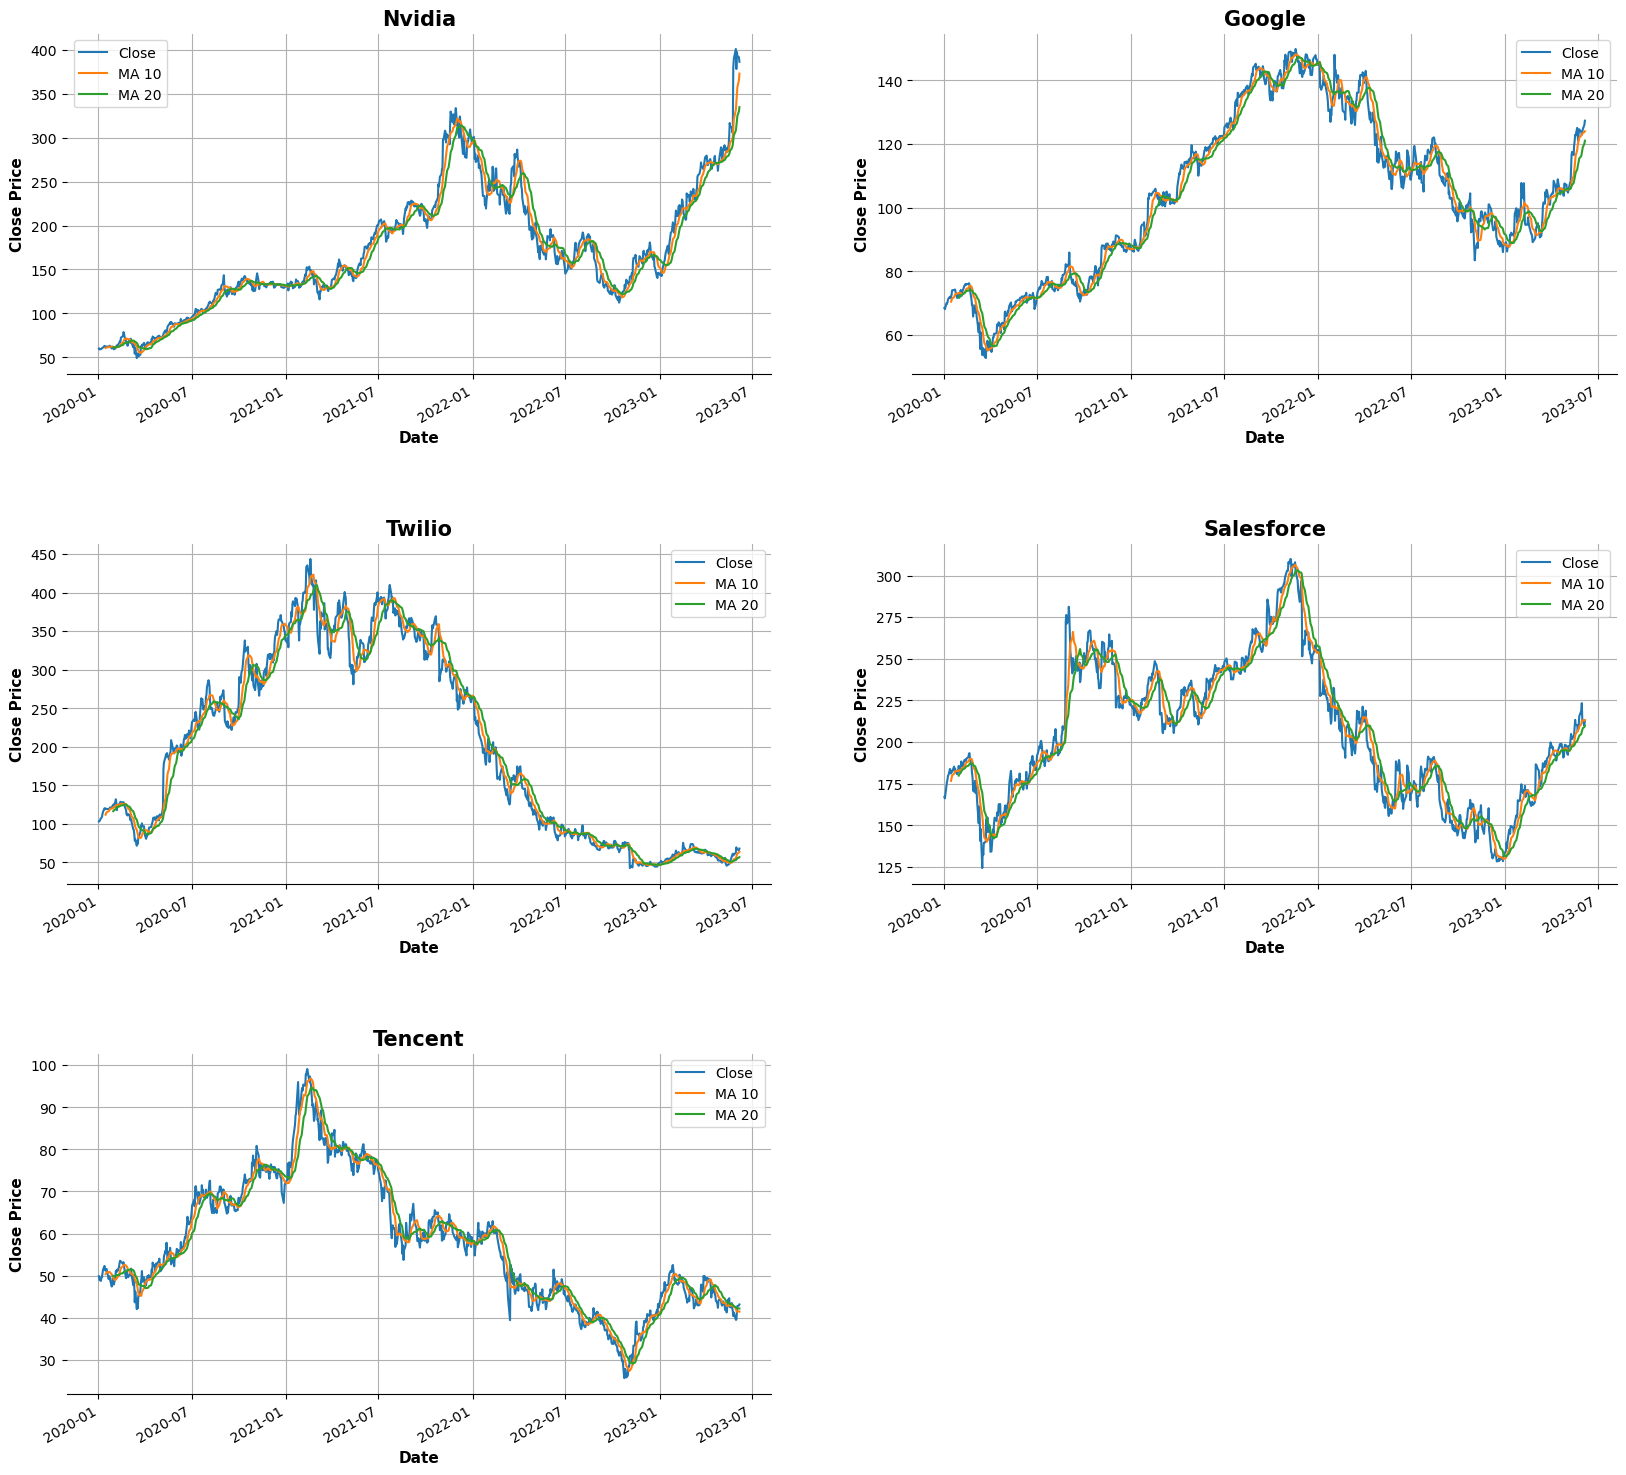

In [9]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
gs = fig.add_gridspec(nrows = 3, ncols = 2, hspace = .5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])

ax0.set_title("Nvidia", fontsize = 15, fontweight = "bold")
nvidia[["Close", "MA 10", "MA 20"]].plot(ax = ax0)
ax0.grid()

ax1.set_title("Google", fontsize = 15, fontweight = "bold")
google[["Close", "MA 10", "MA 20"]].plot(ax = ax1)
ax1.grid()

ax2.set_title("Twilio", fontsize = 15, fontweight = "bold")
twilio[["Close", "MA 10", "MA 20"]].plot(ax = ax2)
ax2.grid()

ax3.set_title("Salesforce", fontsize = 15, fontweight = "bold")
salesforce[["Close", "MA 10", "MA 20"]].plot(ax = ax3)
ax3.grid()

ax4.set_title("Tencent", fontsize = 15, fontweight = "bold")
tencent[["Close", "MA 10", "MA 20"]].plot(ax = ax4)
ax4.grid()

for a in [ax0, ax1, ax2, ax3, ax4]:
    a.set_xlabel("Date", fontsize = 11, fontweight = "bold")
    a.set_ylabel("Close Price", fontsize = 11, fontweight = "bold")
    a.spines[["left", "right", "top"]].set_visible(False)



When the MA10 crosses above the MA20, it is known as a bullish signal. This means that the shorter-term moving average (MA10) has surpassed the longer-term moving average (MA20), indicating that the stock price is likely to continue rising. Traders and investors often interpret this as a positive sign to buy or hold the stock.

Conversely, when the MA10 crosses below the MA20, it is considered a bearish signal. In this case, the shorter-term moving average (MA10) has fallen below the longer-term moving average (MA20), suggesting that the stock price may continue to decline. This is often seen as a negative sign, and some traders may interpret it as a signal to sell or avoid buying the stock.


## **Utilizing Daily Percentage Change: Analyzing Price Volatility.**

The daily percentage change is used to calculate the daily variation in the price of a stock. It is the percentage difference between the closing price of one day and the closing price of the previous day. The daily percentage change is commonly used to evaluate the volatility of a stock as it reflects the relative variation in prices rather than absolute values.

The daily percentage change is used for volatility analysis and assessing the risk associated with a stock. Investors and traders can utilize this measure to identify periods of high volatility, determine the magnitude of price swings, and implement risk management strategies such as setting stop-loss orders or determining profit targets. It is also used in constructing models and investment strategies based on volatility.

Volatility in the price of a stock refers to the measure of variation or fluctuation in the prices of that stock over a specific period of time. It is a measure of the uncertainty or risk associated with the movement of the stock prices.

Volatility is used to assess price variability and understand the degree of change a stock can experience within a given period. A highly volatile stock will have larger price fluctuations compared to a less volatile stock. Volatility is an important consideration for investors and traders as it can impact the profitability and risk of an investment.

In [10]:
company_list = [nvidia, google, twilio, tencent, salesforce]

for company in company_list:
    column_name = "Returns"
    company[column_name] = (company['Close']/company["Close"].shift(1))-1

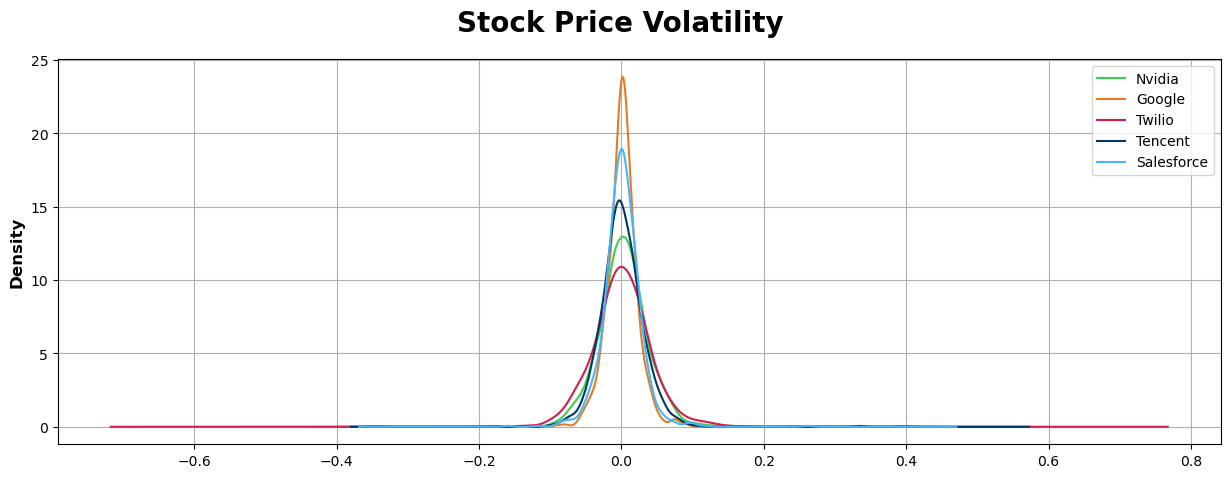

In [11]:
# POSITION 
fig = plt.figure(figsize = (15,5))
fig.suptitle("Stock Price Volatility", fontsize = 20, fontweight = "bold")
gs = fig.add_gridspec(nrows = 1, ncols = 1)
ax0 = fig.add_subplot(gs[0,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)

# VOLUME TRADED PLOT
nvidia["Returns"].plot(kind = "kde", label = "Nvidia", color = "#3CCF4E", ax = ax0)
google["Returns"].plot(kind = "kde", label = "Google", color = "#E57C23", ax = ax0)
twilio["Returns"].plot(kind = "kde", label = "Twilio", color = "#D61C4E", ax = ax0)
tencent["Returns"].plot(kind = "kde", label = "Tencent", color = "#003865", ax = ax0)
salesforce["Returns"].plot(kind = "kde", label = "Salesforce", color = "#47B5FF", ax = ax0)
ax0.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax0.grid()
plt.legend()
plt.show()

Twilio, being a cloud communications company, operates in a constantly evolving and dynamic sector. This inherent nature of the industry can contribute to greater price swings and increased volatility compared to other stocks in the analysis. Investors and traders interested in Twilio should be aware of its high volatility and take it into account when making investment decisions.

Similarly, Nvidia, as a leading technology company, also exhibits a notable level of volatility. This can be attributed to factors such as its exposure to the semiconductor industry, which is subject to technological advancements, market trends, and global demand.

On the other hand, Google, Tencent, and Salesforce show relatively lower levels of volatility compared to Twilio and Nvidia. These companies operate in more established industries and have a strong market presence, which can contribute to more stable price movements.

Stocks with high volatility can offer significant short-term profit opportunities but also come with higher risk and uncertainty. On the other hand, stocks with lower volatility can provide a more stable investment environment, appealing to those seeking a more predictable return.

## **Cumulative Return**

Cumulative Return refers to the total overall return on an investment over a specific period of time. It represents the net gain or loss experienced by an investor from the initial investment until the present. Cumulative return takes into account the price appreciation or depreciation of the investment, as well as any dividends or distributions received during the holding period.

Tracking the cumulative return allows investors to evaluate the long-term performance of their portfolio and make informed decisions regarding their investment strategies. It provides a holistic view of the investment's growth or decline over time, taking into account the compounding effect of returns.

In [12]:
company_list = [nvidia, google, twilio, tencent, salesforce]

for company in company_list:
    column_name = "Cumulative Return"
    company[column_name] = (1 + company['Returns']).cumprod()

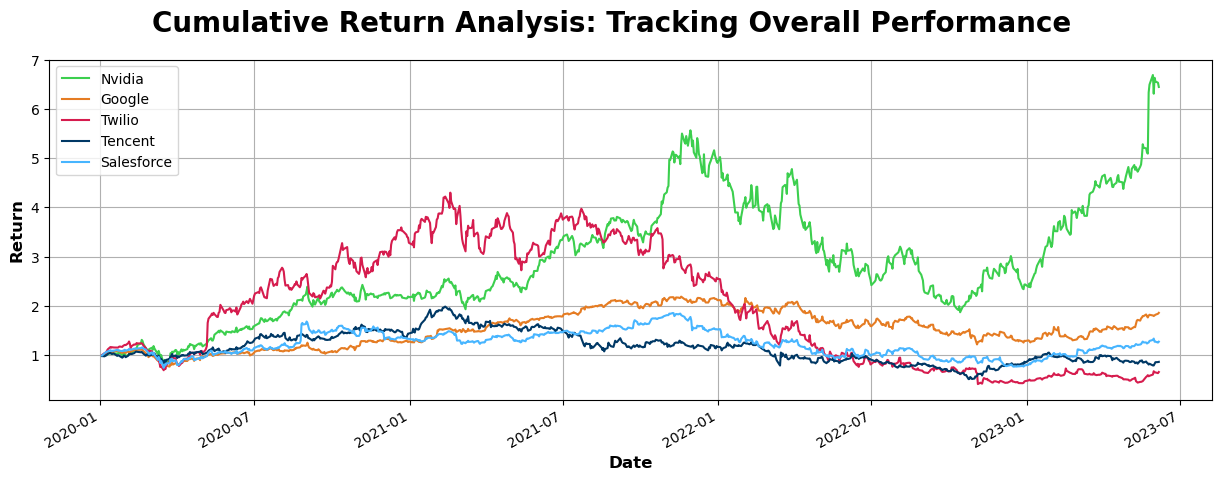

In [13]:
# POSITION 
fig = plt.figure(figsize = (15,5))
fig.suptitle("Cumulative Return Analysis: Tracking Overall Performance", fontsize = 20, fontweight = "bold")
gs = fig.add_gridspec(nrows = 1, ncols = 1)
ax0 = fig.add_subplot(gs[0,0])

# VOLUME TRADED PLOT
nvidia["Cumulative Return"].plot(label = "Nvidia", color = "#3CCF4E", ax = ax0)
google["Cumulative Return"].plot(label = "Google", color = "#E57C23", ax = ax0)
twilio["Cumulative Return"].plot(label = "Twilio", color = "#D61C4E", ax = ax0)
tencent["Cumulative Return"].plot(label = "Tencent", color = "#003865", ax = ax0)
salesforce["Cumulative Return"].plot(label = "Salesforce", color = "#47B5FF",ax = ax0)
ax0.set_ylabel("Return", fontsize = 12, fontweight = "bold")
ax0.set_xlabel("Date", fontsize = 12, fontweight = "bold")
ax0.grid()
plt.legend()
plt.show()

Cumulative return in Twilio and Nvidia can be analyzed by considering the sector they belong.

Twilio, as a cloud communications company, operates in a highly dynamic and ever-evolving sector. This inherent nature of the industry can contribute to higher volatility compared to other stocks in the analysis. While volatility may have resulted in a current investment value of less than one dollar, there could also be significant growth opportunities in the future, given the potential for innovation and expansion in the cloud communications sector.

On the other hand, Nvidia operates in the semiconductor and technology sector. While it may also experience some volatility, this sector has solid demand and a wide range of applications across various industries. The semiconductor industry has seen significant growth in recent years due to technological advancements and trends like artificial intelligence and high-performance computing. This stable and growing demand may have contributed to a more favorable cumulative return in Nvidia, with a value close to 7 dollars.

## **Exploration Of Correlation Between Stocks**

In [14]:
dfc = pd.concat([nvidia["Close"], google["Close"], twilio["Close"], tencent["Close"], salesforce["Close"]], axis = 1)
dfr = pd.concat([nvidia["Returns"], google["Returns"], twilio["Returns"], tencent["Returns"], salesforce["Returns"]], axis = 1)
dfc.columns = ["Nvidia", "Google", "Twilio", "Tencent", "Saleforce"]
dfr.columns = ["Nvidia", "Google", "Twilio", "Tencent", "Saleforce"]

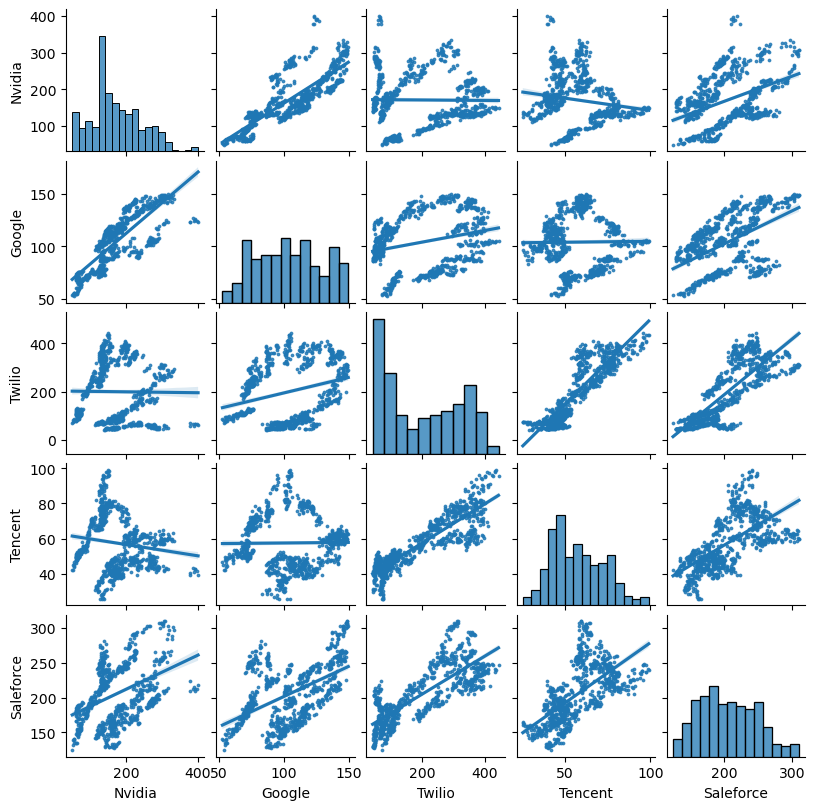

In [15]:
plot = sns.pairplot(dfc, kind = "reg", plot_kws = dict(scatter_kws = dict(s = 3)))
plot.fig.set_size_inches(8,8)
plt.show()

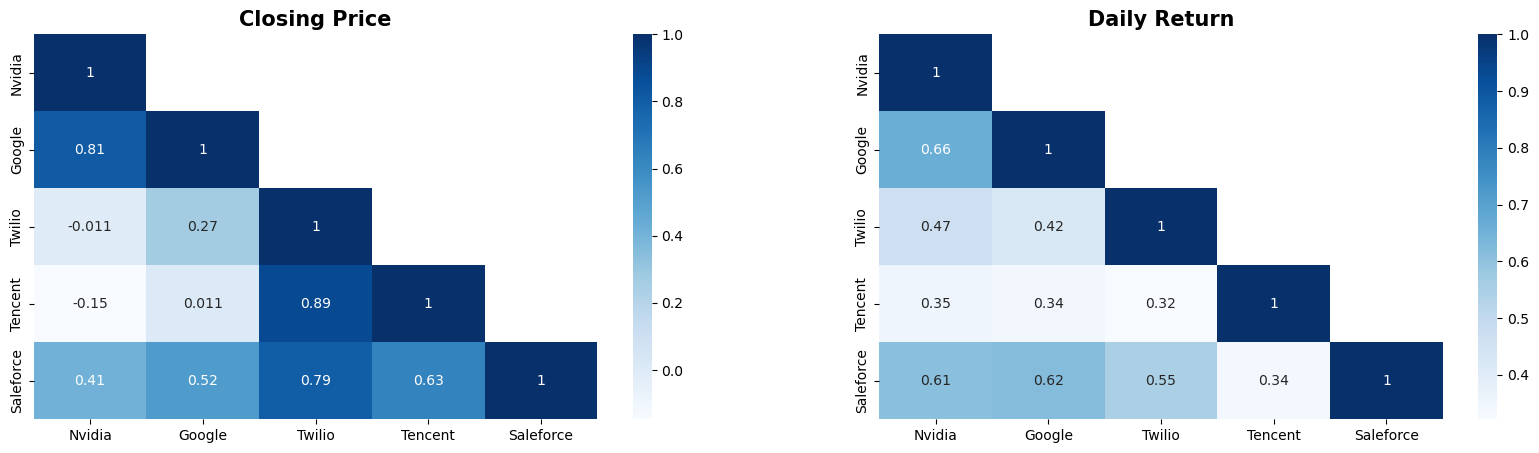

In [16]:
# VARIABLES
corr1 = dfc.corr()
mask1 = np.triu(np.ones_like(corr1), k = 1)

corr2 = dfr.corr()
mask2 = np.triu(np.ones_like(corr2), k = 1)

# POSITION
fig = plt.figure(figsize = (20, 5))
gs = fig.add_gridspec(nrows = 1, ncols = 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# CLOSING PRICE CORRELATION MATRIX
sns.heatmap(dfc.corr(), annot=True, mask = mask1, cmap = "Blues", ax = ax0)
ax0.set_title("Closing Price", fontsize = 15, fontweight = "bold")

# DAILY RETURN CORRELATION MATRIX
sns.heatmap(dfr.corr(), annot=True, mask = mask2, cmap = "Blues", ax = ax1)
ax1.set_title("Daily Return", fontsize = 15, fontweight = "bold")

plt.show()

## **Evaluation Of Risk Associated With Investing**

There are various ways to assess the risk associated with an investment. One of the most basic methods, using the information gathered on daily percentage returns, is to compare the expected return with the standard deviation of the daily returns.

The expected return represents the average gain expected from the investment, while the standard deviation reflects the volatility or variability of the returns in relation to the average return. A higher standard deviation indicates greater uncertainty and associated risk.

By comparing the expected return with the standard deviation, we can evaluate whether the potential return justifies the level of risk taken. If the expected return is high in relation to the standard deviation, it may indicate a favorable risk-reward relationship. Conversely, if the expected return is low compared to the standard deviation, it could indicate higher risk relative to the potential for gain.

It is important to note that using standard deviation as a measure of risk has certain limitations, as it assumes that the returns follow a normal distribution. In practice, returns may have non-normal distributions, and there are more advanced methods such as value at risk (VaR) and stress testing to assess risk more accurately.

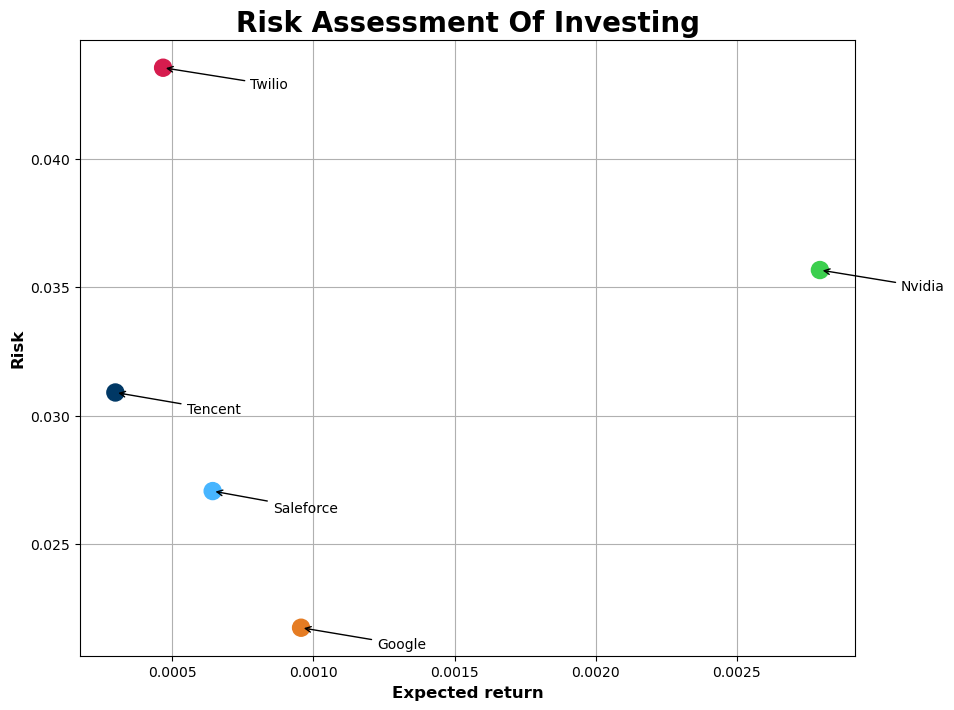

In [20]:
dfr = pd.concat([nvidia["Returns"], google["Returns"], twilio["Returns"], tencent["Returns"], salesforce["Returns"]], axis = 1)
dfr.columns = ["Nvidia", "Google", "Twilio", "Tencent", "Saleforce"]
rets = dfr.dropna()
area = np.pi * 20
colors = ["#3CCF4E", "#E57C23", "#D61C4E", "#003865","#47B5FF"]

plt.figure(figsize=(10, 8))
plt.title("Risk Assessment Of Investing", fontsize = 20, fontweight = "bold")
plt.scatter(rets.mean(), rets.std(), s = 150, color = colors)
plt.xlabel('Expected return', fontsize = 12, fontweight = "bold")
plt.ylabel('Risk', fontsize = 12, fontweight = "bold")
plt.grid()

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x, y), xytext = (90, -15), textcoords = 'offset points', ha = 'right', va = 'baseline', arrowprops = dict(arrowstyle = '->', color = "black", connectionstyle = 'arc'))


#### **Risk / Return Ratio** 
The risk/return ratio indicates how much return can be expected per unit of risk assumed. A higher ratio suggests a greater potential return relative to the risk.

To calculate the risk/return ratio using the daily returns:  

In [18]:
rets_mean = rets.mean()
rets_std = rets.std()
risk_return_ratio = rets_mean / rets_std

In [19]:
risk_return_ratio

Nvidia       0.078322
Google       0.044016
Twilio       0.010739
Tencent      0.009670
Saleforce    0.023781
dtype: float64

**Nvidia:** With a risk/return ratio of 0.078322, Nvidia exhibits a relatively high potential return compared to the assumed risk. Investors may find this stock attractive due to the potential for higher returns, although it also comes with a higher level of risk.


**Google:** Google has a risk/return ratio of 0.044016, indicating a favorable balance between risk and return. This suggests that investors can expect a relatively higher return for the assumed level of risk. Google may be considered a relatively stable investment option.

**Twilio:** Twilio has a risk/return ratio of 0.010739, suggesting a lower expected return in proportion to the risk taken. Investors may need to carefully evaluate the potential return against the associated risk before making investment decisions. 

**Tencent:** With a risk/return ratio of 0.009670, Tencent shows a similar pattern to Twilio. The expected return is relatively lower compared to the assumed risk. Investors should consider this lower potential return when assessing the investment opportunity.

**Salesforce:** Salesforce has a risk/return ratio of 0.023781, indicating a moderate risk-reward balance. The expected return is relatively higher compared to the risk assumed, making it an attractive option for investors seeking a balanced investment with a moderate level of risk.

Nvidia exhibits the highest risk/return ratio, suggesting the potential for higher returns but also higher volatility. Google and Salesforce demonstrate more balanced risk-reward profiles. Twilio and Tencent have lower risk/return ratios, indicating lower potential returns relative to the risk involved.